In [ ]:
cd/content/drive/MyDrive/dogs-vs-cats

/content/drive/MyDrive/dogs-vs-cats


## Extract all the files from zip

In [ ]:
from zipfile import ZipFile
import os
from os import makedirs

In [ ]:
with ZipFile ('train.zip', 'r') as zipObj:
  # Extract all the contents of Zip file in current directory
  zipObj.extractall()

with ZipFile ('test1.zip', 'r') as zipObj:
  # Extract all the contents of zip file in current directory
  zipObj.extractall()

## Create sub directories so the data is in this format

In [ ]:
# -dataset_dogs_vs_cats
#     -train
#         --dogs
#         --cats
#     -test
#         --dogs
#         --cats

In [ ]:
# Create directories
dataset_name = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
  labeldirs = ['dogs/', 'cats/']
  for labeldir in labeldirs:
    newdir = dataset_name + subdir + labeldir
    makedirs(newdir, exist_ok = True)  

## Now change your dataset to fit this format

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
# Create directories
from random import seed , random

In [ ]:
seed(1)

The seed() method is used to initialize the random number generator. The random number generator needs a number to start with (a seed value), to be able to generate a random number. By default the random number generator uses the current system time.

In [ ]:
# define ratio of pictures to use for validation
val_ratio = 0.25
# Copy training dataset image into subdirectories
src_directory = 'train'
dataset_name = 'dataset_dogs_vs_cats/'

for file in listdir(src_directory):
  src = src_directory + '/' + file
  dst_dir = 'train/'
  if random() < val_ratio:
    dst_dir = 'test/'
  
  if file.startswith('cat'):
    dst = dataset_name + dst_dir + 'cats/'+ file
    copyfile(src, dst)

  elif file.startswith('dog'):
    dst = dataset_name + dst_dir + 'dogs/' + file
    copyfile(src, dst)

## Prepare a model for transfer learning

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model = VGG16(include_top = False, input_shape = (224, 224, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# mark loaded layers as not trainable
for layer in model.layers:
  layer.trainable = False

In [ ]:
# Add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(flat1)
output = Dense(1, activation = 'sigmoid')(class1)

Sigmoide is used when we are having binary output
but in case of when we are having more than one class then we use Softmax 

In [ ]:
# Define new model
model = Model(inputs = model.inputs, outputs = output)

In [ ]:
# compile model
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

## Run the model using Image Generator

In [ ]:
datagen = ImageDataGenerator(featurewise_center = True)
# Specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]

# Prepare iterator
train_it =  datagen.flow_from_directory('dataset_dogs_vs_cats/train/', class_mode = 'binary', batch_size = 64, target_size = (224, 224))
test_it =  datagen.flow_from_directory('dataset_dogs_vs_cats/test/', class_mode = 'binary', batch_size = 64, target_size = (224, 224))


Found 23559 images belonging to 2 classes.
Found 11069 images belonging to 2 classes.


In [ ]:
print(train_it.class_indices)
print(test_it.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [ ]:
# Fit Model
history = model.fit_generator(train_it, steps_per_epoch = len(train_it), 
                              validation_data = test_it, validation_steps = len(test_it), epochs=5, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
369/369 [==============================] - 1217s 3s/step - loss: 0.2197 - accuracy: 0.9659 - val_loss: 0.0338 - val_accuracy: 0.9883
Epoch 2/5
369/369 [==============================] - 203s 550ms/step - loss: 0.0260 - accuracy: 0.9906 - val_loss: 0.0184 - val_accuracy: 0.9948
Epoch 3/5
369/369 [==============================] - 205s 556ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0124 - val_accuracy: 0.9966
Epoch 4/5
369/369 [==============================] - 205s 557ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0133 - val_accuracy: 0.9968
Epoch 5/5
369/369 [==============================] - 205s 556ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0141 - val_accuracy: 0.9967


In [ ]:
import matplotlib.pyplot as plt
import sys

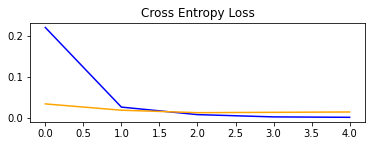

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'test')

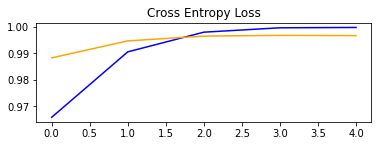

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'test')

In [ ]:
# save plot file
filename = sys.argv[0].split('/')[-1]
plt.savefig(filename + '_plot.png')

<Figure size 432x288 with 0 Axes>

## save the model for future use

In [ ]:
model.save('final_model.h5')


In [ ]:
import tensorflow as tf

## Predict output from model

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
# Load and prepare the image
# load the image
img = load_img('/content/drive/MyDrive/dogs-vs-cats/dataset_dogs_vs_cats/test/dogs/dog.100.jpg', target_size = (224, 224))


In [ ]:
model = load_model('/content/drive/MyDrive/dogs-vs-cats/final_model.h5')

In [ ]:
# convert to array
img = img_to_array(img)

In [ ]:
# Reshape into a single sample with 3 channels
img = img.reshape(1, 224, 224, 3)

In [ ]:
# Center pixel data
img = img.astype('float32')
img = img - [123.68, 116.779, 103.939]

In [ ]:
# 1 is for dogs and 0 for cats
result = model.predict(img)
print(result[0])

[1.]
